In [7]:
# 일부 이미지 분리(총 4000개)

import os, shutil

original_dataset_dir = './data/cats_dogs/train'

## directory 생성 ##

base_dir = 'data/cat_dog_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train').replace('\\','/')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation').replace('\\','/')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test').replace('\\','/')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats').replace('\\','/')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs').replace('\\','/')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats').replace('\\','/')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs').replace('\\','/')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats').replace('\\','/')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs').replace('\\','/')
os.mkdir(test_dogs_dir)

## file 복사 ##

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'data/cat_dog_small'

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './data/cat_dog_small/train'
validation_dir = './data/cat_dog_small/validation'

In [9]:
# ImageDataGenerator 생성

# 모든 이미지 데이터의 값을 1/255로 scaling(MinMaxScaling)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                    # target directory
    classes=['cats', 'dogs'],     # cats, dogs 순서로 label 0,1
                                  # (생략하면 폴더순서로 label적용)
    target_size=(150,150),        # image size scaling
    batch_size=20,                # 한번에 20개의 이미지를 가져온다. 
                                  # label에 상관없이 가져온다.
    class_mode='binary')          # 고양이와 멍멍이만 존재하므로 
                                  # 2진 분류이기 때문에 binary
                                  # 다중분류인 경우 'categorical'(기본값), 
                                  # 'sparse' 이용가능
                                  # 오토인코더처럼 입력을 target으로 하는 경우 'input'
                     
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
model = Sequential()

model.add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                    kernel_size=(3,3),
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                    kernel_size=(3,3),
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=512,
                activation='relu'))
model.add(Dense(units=1,
                activation='sigmoid'))

print(model.summary())

model.compile(optimizer=RMSprop(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])

## keep in mind that by default, batch_size is 32 in model.fit()
## steps_per_epoch = len(X_train) // batch_size

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

KeyboardInterrupt: 

In [ ]:
# Augmentation (증식)

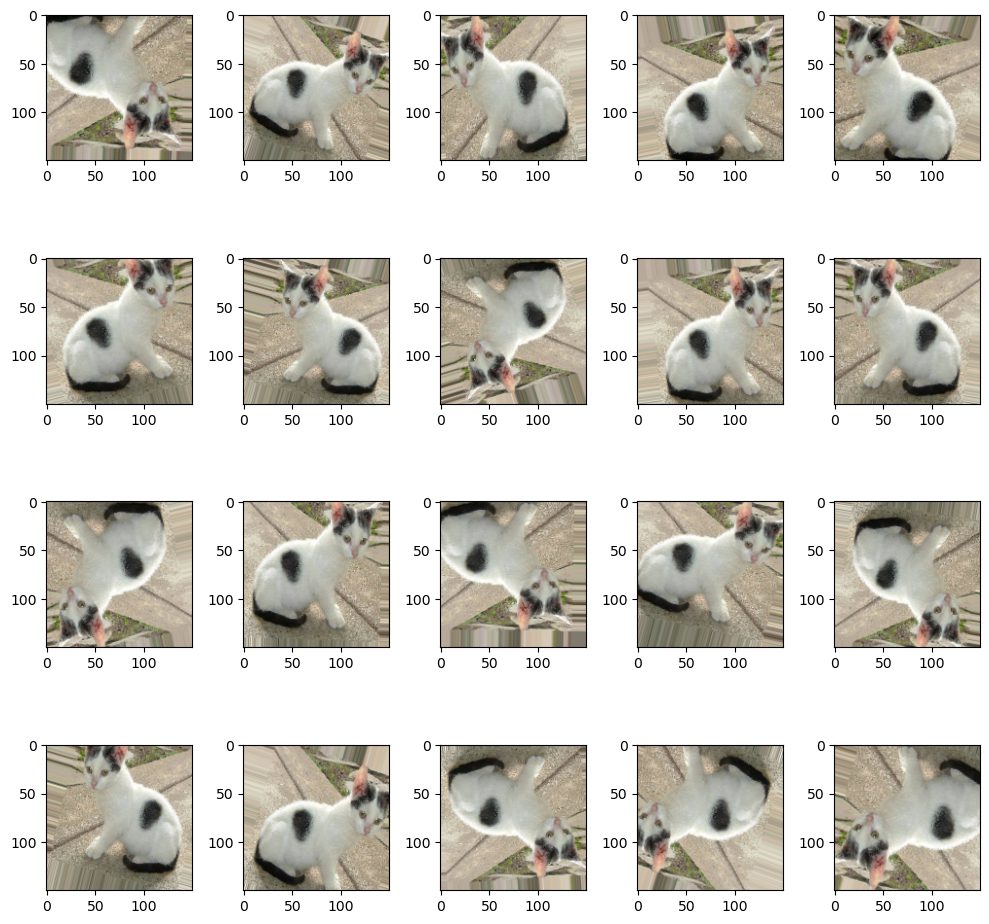

In [4]:
# data augmentation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rotation_range=20,    
                             # 지정된 각도 범위내에서 임의로 원본이미지를 회전
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             # 지정된 방향 이동 범위내에서 임의로 원본이미지를 이동. 
                             # 수치는 전체 넓이의 비율(실수)                             
                             shear_range=0.1,
                             # 밀림 강도 범위내에서 임의로 원본이미지를 변형. 
                             # 수치는 시계반대방향으로 밀림 강도를 라디안으로 표시
                             zoom_range=0.1,
                             # 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소. 
                             # "1-수치"부터 "1+수치"사이 범위로 확대/축소 
                             horizontal_flip=True,
                             vertical_flip=True,  
                             # 수평, 수직방향으로 뒤집기.
                             fill_mode='nearest')

img = image.load_img('./data/cat_dog_small/train/cats/cat.3.jpg',
                     target_size=(150,150))

x = image.img_to_array(img)  # (150,150,3)
x = x.reshape((1,) + x.shape) # (1,150,150,3)


fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1):
    imgplot = axs[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx % 20 == 0:
        break
        
fig.tight_layout()
plt.show()

# cat, dog 1000장 데이터로 증식 실습

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './data/cat_dog_small/train'
validation_dir = './data/cat_dog_small/validation'


In [3]:
# ImageDataGenerator 생성

# 모든 이미지 데이터의 값을 1/255로 scaling 하면서 augmentation
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Validation data에 대해서는 당연히 증식을 사용하면 안된다.
validation_datagen = ImageDataGenerator(rescale=1/255)


In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,                    # target directory
    classes=['cats', 'dogs'],     # cats, dogs 순서로 label 0,1
                                  # (생략하면 폴더순서로 label적용)
    target_size=(150,150),        # image size scaling
    batch_size=32,                # 한번에 32개의 이미지를 가져온다. 
                                  # label에 상관없이 가져온다.
    class_mode='binary')          # 고양이와 멍멍이만 존재하므로 
                                  # 2진 분류이기 때문에 binary
                                  # 다중분류인 경우 'categorical'(기본값), 
                                  # 'sparse' 이용가능
                                  # 오토인코더처럼 입력을 target으로 하는 경우 'input'
                     
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(units=512,
                activation='relu'))
model.add(Dense(units=1,
                activation='sigmoid'))

print(model.summary())

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## keep in mind that by default, batch_size is 32 in model.fit()
## steps_per_epoch = len(X_train) // batch_size
## validation_steps = len(X_test) // batch_size

history = model.fit(train_generator,
                    steps_per_epoch=62,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=31)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0